In [15]:
## importing all the libraries required for analyzing the covid dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
%matplotlib inline

In [13]:
!pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---- ----------------------------------- 2.1/19.1 MB 19.5 MB/s eta 0:00:01
   ---------------------- ----------------- 10.7/19.1 MB 30.5 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 33.1 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 28.6 MB/s eta 0:00:00


In [4]:
## reading the csv file into our workspace using pandas library
df = pd.read_csv('country_wise_latest.csv')

In [5]:
## making a copy of the original data frame
df_copy = df.copy()

In [6]:
## using info function to get the basic idea of the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [7]:
## looking at the top 5 elements of the dataset to understand the dataset better
df_copy.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [8]:
## checking if the dataset has any null values
df_copy.isnull()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
## to understand the statistics of the data, we can use describe function
df_copy.describe()

c:\Users\Vamshika Gangapuram\anaconda3\envs\pybase\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [10]:
## then we have to check for duplicated columns
df_copy.duplicated(subset=None)

0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Length: 187, dtype: bool

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

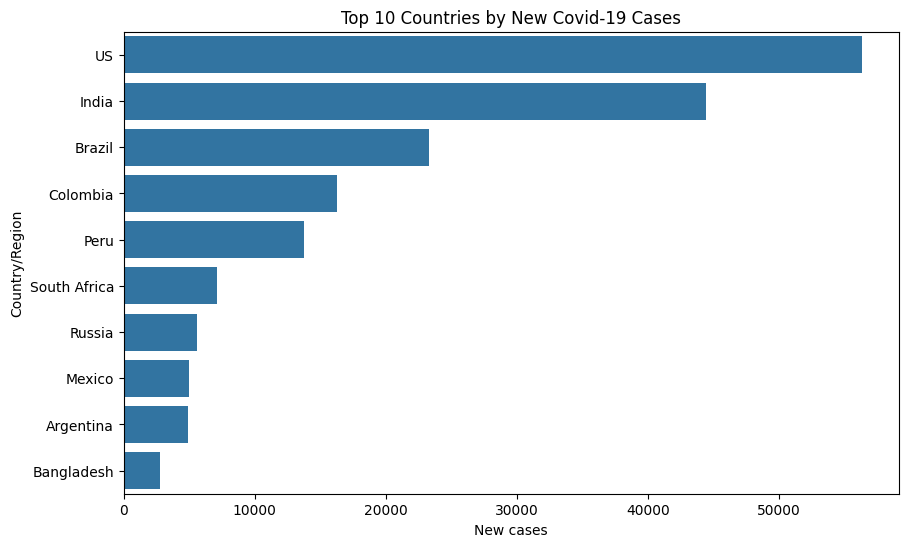

In [33]:
## Group by country and analyze the total new cases, new deaths, and new recovered
country_summary = df_copy.groupby('Country/Region').agg({'New cases' : 'sum','New deaths' : 'sum', 'New recovered' : 'sum'}).reset_index()

## Sort the data by number of new cases 
country_summary_by_cases = country_summary.sort_values(by='New cases', ascending=False)

## Visualize top 10 countries by cases
plt.figure(figsize=(10,6))
sns.barplot(x='New cases', y='Country/Region', data=country_summary_by_cases.head(10))
plt.title('Top 10 Countries by New Covid-19 Cases')
plt.show()

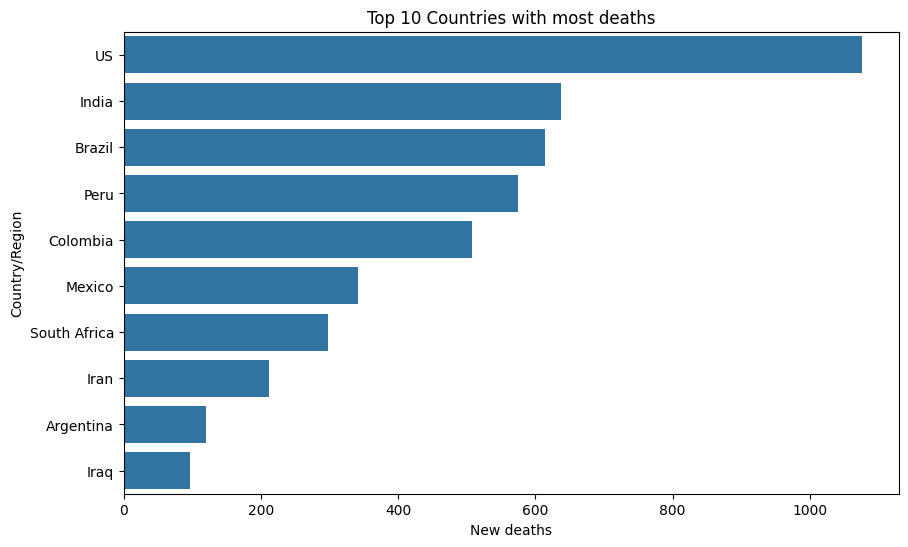

In [34]:
## sort the data by number of new deaths
country_summary_by_deaths = country_summary.sort_values(by='New deaths', ascending = False)

## Visualize top 10 countries with most number of deaths
plt.figure(figsize=(10,6))
sns.barplot(x='New deaths', y='Country/Region', data = country_summary_by_deaths.head(10))
plt.title("Top 10 Countries with most deaths")
plt.show()

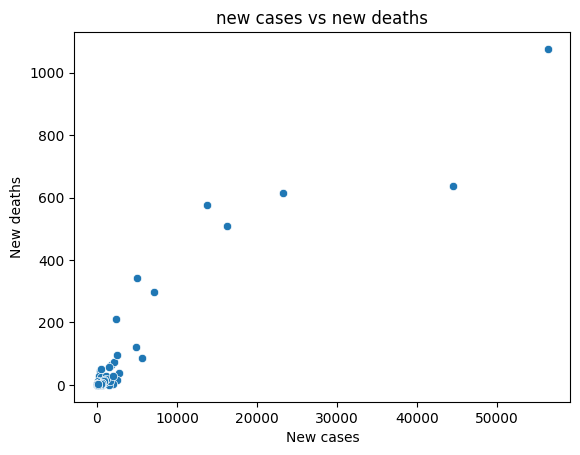

In [37]:
## plot new cases vs new deaths
sns.scatterplot(x='New cases', y='New deaths', data = df_copy)
plt.title('new cases vs new deaths')
plt.show()

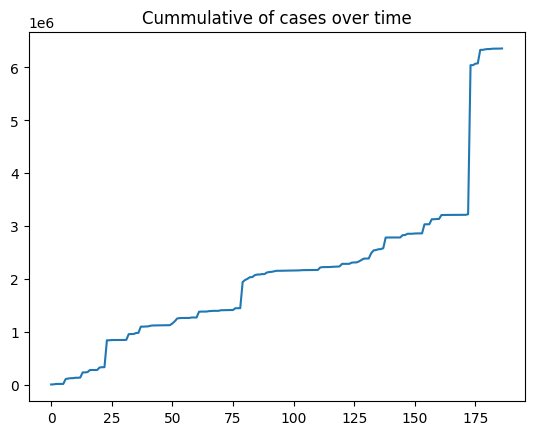

In [43]:
## cummulative sum of cases
df_copy['cummulative cases'] = df_copy['Active'].cumsum()

## plot cummulative sum over time
df_copy['cummulative cases'].plot()
plt.title('Cummulative of cases over time')
plt.show()

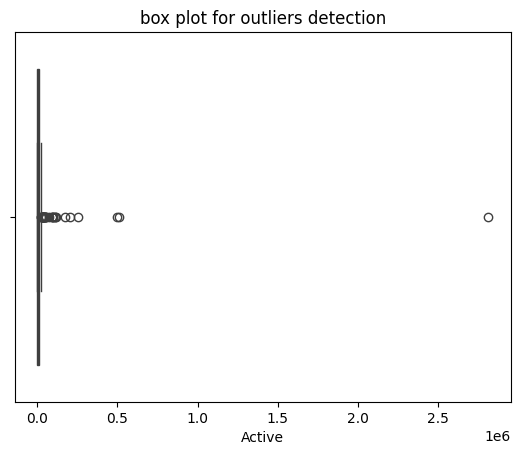

In [45]:
## Boxplot to detect the outliers in New cases columns
sns.boxplot(x=df_copy['Active'])
plt.title('box plot for outliers detection')
plt.show()